In [1]:
scClass_path = !cd ..;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd

In [3]:
filename_data = "../../dataset/HTD_Thymic.h5ad"
adata = sc.read_h5ad(filename_data)
adata.X

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<64858x58347 sparse matrix of type '<class 'numpy.float32'>'
	with 151761960 stored elements in Compressed Sparse Row format>

In [4]:
adata = scClass.pp.preprocess(adata,filter=False,normalize=False)

shuffling data


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
adata = scClass.pp.transmodel(adata,gene='gene_names',gene_ref='Gene')

/home/shhsu/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


get gene seq...
0% 8% 17% 25% 34% 42% 51% 59% 68% 77% 85% 94% 
Of 58347 genes in the input file, 20409 were found in the training set of 20729 genes.
mapping to model...
0% 

In [6]:
adata = scClass.pp.preprocess(adata,filter=False,random=False,normalize=True)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


normalizing data


In [7]:
model = scClass.load('../scClass/data/model_all.pkl')

loading model from:  ../scClass/data/model_all.pkl


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
0% 30% 61% 92% 

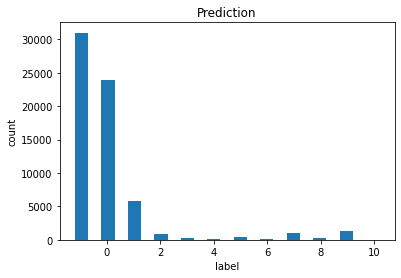

In [8]:
y_pred = scClass.predict(adata,model,batch_size=20_000)

In [9]:
# scClass.save_predict('y_pred_cordblood.csv',y_pred)

## Verify with previous label

total acc: 66.44824077214838 %


,label
-1,unknown
0,T-helper cell
1,cytotoxic T cell
2,memory B cell
3,naive B cell
4,plasma cell
5,natural killer cell
6,erythrocyte
7,megakaryocyte
8,monocyte

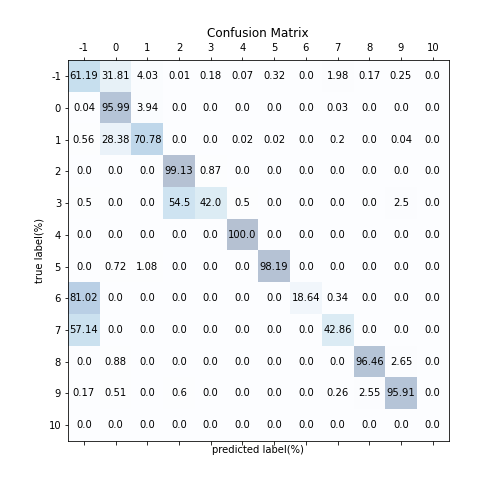

In [10]:
y_true = adata.obs['modelC id'].values 
fig = scClass.confusion_matrix(y_pred,y_true,filter=False)
scClass.figure_html(fig)

In [11]:
scClass.plot_performance(y_pred,y_true)

,Performance,Value
0,accuary,0.664482
1,precision,0.746516
2,recall,0.588259
3,f1-score,0.565695
